# Lesson I

In this chapter, you will use a second dataset to explore the impact of weather conditions on police behavior during traffic stops. You will practice merging and reshaping datasets, assessing whether a data source is trustworthy, working with categorical data, and other advanced skills.

## Exploring the weather dataset

The weather data you'll be using was collected by the National Centers for Environmental Information. 

***Our hypothesis is that weather conditions impact police behavior during traffic stops***, so ideally we would look up the historical weather at the location of each stop. 

However, the traffic stops dataset does not specify stop location, so we're going to use the data from a single weather station near the center of Rhode Island. 

This is not ideal, but Rhode Island is the smallest US state and so a single station will still give us a general idea of the weather throughout the state.

### Examining the columns

Let's read the weather dataset into a DataFrame and then look at the head...

In [1]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt

# Weather Dataset
weather = pd.read_csv('datasets/weather.csv')

# Examine the head
weather.head(3)

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


* ``TAVG``, ``TMIN``, ``TMAX``: Temperature
* ``AWND``, ``WSF2`` : Wind Speed
* ```WT01`` .... ``WT22``: Bad weather conditions.

### Examining the wind speed

Before using a new dataset, it's a good practice to explore the data to check that the values seem reasonable. If you don't find anything unreasonable, then you gain increased confidence that the data is trustworthy.


For example, let's take a look at the two columns related to wind speed. ``AWND`` is *average wind speed* in miles per hour, and ``WSF2`` is the *fastest 2-minute wind speed*, meaning the fastest wind speed during any 2-minute period.

In [2]:
# Examine the wind speed columns
weather[['AWND', 'WSF2']].head()

,AWND,WSF2
0,8.95,25.1
1,9.40,14.1
2,6.93,17.0
3,6.93,16.1
4,7.83,17.0


We can use the ``describe()`` method on these two columns to see summary statistics including the minimum, maximum, and 25th through 75th percentiles. 

In [3]:
# Describe() method
weather[['AWND', 'WSF2']].describe()

,AWND,WSF2
count,4017.000000,4017.000000
mean,8.593707,19.274782
std,3.364601,5.623866
min,0.220000,4.900000
25%,6.260000,15.000000
50%,8.050000,17.900000
75%,10.290000,21.900000
max,26.840000,48.100000


Notice that the minimum values are above zero, and the fastest wind speed values are greater than the average wind speed values. Also, the numbers seem reasonable given that they are measured in miles per hour. These are all simple signs that the data is trustworthy.

### Creating a box plot

Another way to examine these values is with a box plot, by specifying kind equals box when plotting. 

This is essentially a visual representation of the summary statistics, in that the box represents the 25th through 75th percentiles, and the lines below and above the box represent the minimum and maximum values, excluding the outliers represented by circles. 

Again, our goal here is simply to validate that the data looks reasonable.

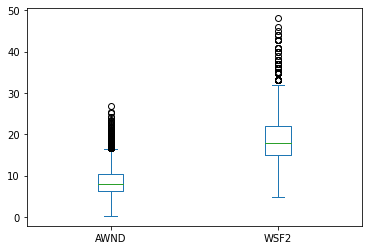

In [4]:
# Creating a box plot
weather[['AWND', 'WSF2']].plot(kind='box')

# Show plot
plt.show()

### Creating a histogram

It would also be useful to validate that the fastest wind speed values are greater than the average values for every single row. 

We'll do this by subtracting the average speed from the fastest speed and storing the results in a new column.

We'll visualize the new column using a histogram so that we can see its distribution.

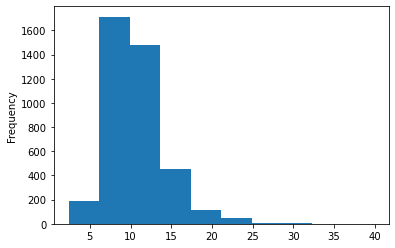

In [6]:
# Creating a new column
weather['WDIFF'] = weather.WSF2 - weather.AWND

# Plot a histogram
weather.WDIFF.plot(kind='hist')

# Show plot
plt.show()

There are no values below zero, which is a good sign. But because there are some extreme values, it's hard to clearly see the shape of the distribution.

We can make the shape more clear by changing the number of histogram bins to 20. This creates more narrow bins than the default value of 10. 

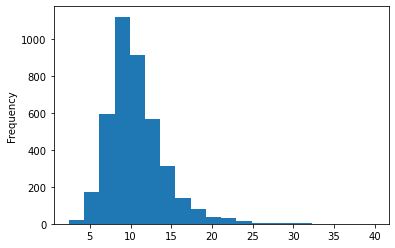

In [7]:
# Plot a histogram with 20 bins
weather.WDIFF.plot(kind='hist', bins=20)

# Show plot
plt.show()

We can now see that the difference between the fastest and average wind speed values has an approximately normal shape. Many natural phenomena have a normal distribution, and so this shape is another sign that the dataset is trustworthy.

# Lesson II

## Categorizing the weather

Now that we've reviewed the weather dataset and concluded that it's a trustworthy source, we can start preparing it for analysis. But first, let's review a few pandas techniques we'll be using.

The weather DataFrame has **4,017** rows and **28** columns. 

Let's say that we wanted to copy the three temperature columns to a new DataFrame called ``temp``. How might we do this?

In [8]:
# Shape of the weather dataframe
weather.shape

(4017, 28)

In [9]:
# Column names of weather dataframe
weather.columns

Index(['STATION', 'DATE', 'TAVG', 'TMIN', 'TMAX', 'AWND', 'WSF2', 'WT01',
       'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10',
       'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21',
       'WT22', 'WDIFF'],
      dtype='object')

### Selecting a DataFrame Slice

You might recall that the ``loc`` accessor allows you to extract a DataFrame slice by specifying the starting and ending labels of your desired selection. 

In this case, we'll select **all rows** (represented by the first colon) and the columns ``TAVG`` through ``TMAX`` and save them to ``temp``. 

In [10]:
temp = weather.loc[:, 'TAVG':'TMAX']

temp.shape

(4017, 3)

You can see that the ``temp`` DataFrame contains all **4,017** rows but just **3** columns. 

This method is particularly useful when you need to select a large number of columns that are side-by-side.

### DataFrame Operations

Let's take a look at the head of ``temp``:

In [11]:
temp.head()

,TAVG,TMIN,TMAX
0,44.0,35,53
1,36.0,28,44
2,49.0,44,53
3,42.0,39,45
4,36.0,28,43


What would happen if you used the ``sum()`` method on the DataFrame? pandas will actually return the sum of each of the three columns.

In [12]:
temp.sum()

TAVG     63884.0
TMIN    174677.0
TMAX    246116.0
dtype: float64

But what if you wanted to calculate the sum of each *row?* 

You can do this by specifying ``axis=columns``, and you'll see that each value is the sum of the three temperature values in that row. 

You may find it confusing that specifying the columns axis leads pandas to calculate row sums. But for mathematical operations, the axis specifies the array dimension that is being aggregated, and aggregating the columns is how you combine the data for each row.

In [13]:
temp.sum(axis='columns').head()

0    132.0
1    108.0
2    146.0
3    126.0
4    107.0
dtype: float64

### Mapping one set of values to another

Let's return to the traffic stops dataset and the ``stop_duration`` column:

In [16]:
# Traffic stops datasets
ri = pd.read_csv('datasets/police.csv')

## Cleaning and validating DataFrame as in Chapter 1
# Dropping the county_name column
ri.drop('county_name', axis='columns', inplace=True)
# Dropping stop_date and stop time rows with missing values
ri.dropna(subset=['stop_date', 'stop_time'], inplace=True)
# Dropping state column
ri.drop('state', axis='columns', inplace=True)
# Dropping driver_gender rows with missing values
ri.dropna(subset=['driver_gender'], inplace=True)


# Check the stop duration column values
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min'], dtype=object)

You might remember that you can map one set of values to another using the Series ``map()`` method. 

In this case, we'll create a dictionary that maps the ``stop_duration`` values to the strings ``short``, ``medium``, and ``long``. 

Then we'll use the ``map()`` method to create a column called ``stop_length``. The ``stop_length`` column has the ``object`` data type since it contains ``string`` data.

In [17]:
mapping = {'0-15 Min':'short',
           '16-30 Min':'medium',
           '30+ Min':'long'}

ri['stop_length'] = ri.stop_duration.map(mapping)
ri.stop_length.dtype

dtype('O')

### Changing data type from object to Category

Whenever you have an object column with a small number of possible values, as is the case here, you may want to change its data type to category.

In [18]:
ri.stop_length.unique()

array(['short', 'medium', 'long'], dtype=object)

* Category type stores the data more efficiently
* Allows you to specify a logical order for the categories

Before we change the data type of the ``stop_length`` Series, we'll use a Series method to calculate its current memory usage...

In [19]:
ri.stop_length.memory_usage(deep=True)

6068041

To change the data type, we first create a special pandas object called a ``CategoricalDtype``. 

We pass it a Python list to define the logical order of the categories, and we specify that the categories should be treated as ordered. 

Then, we change the data type by passing the ``CategoricalDtype`` object to the ``astype()`` method.

By changing the data type, you can see that the memory usage of this column has been reduced...


In [28]:
from pandas.api.types import CategoricalDtype

cats = ['short', 'medium', 'long']

cat_type = CategoricalDtype(categories=cats, ordered=True)

ri['stop_length'] = ri.stop_length.astype(cat_type)

ri.stop_length.memory_usage(deep=True)

779118

### Using Ordered Categories

Let's take a look at the head of this column:

In [29]:
ri.stop_length.head()

0     short
1     short
2     short
3    medium
4     short
Name: stop_length, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']

In the bottom two lines, you can see that the dtype is now category and the categories are ordered from short to long. Because of the ordering, you can now use comparison operators with this column.

For example, you can specify that ``stop_length`` is *greater than short* in order to filter the DataFrame to only include medium or long stops. 

In addition, pandas will automatically sort ordered categories logically rather than alphabetically, which can make the results of a calculation easier to understand.

In [30]:
ri[ri.stop_length > 'short'].shape

(16959, 14)

In [31]:
ri.groupby('stop_length').is_arrested.mean()

stop_length
short     0.013654
medium    0.093595
long      0.261572
Name: is_arrested, dtype: float64

## Exercise

### Counting bad weather conditions

The ``weather`` DataFrame contains **20** columns that start with ``'WT'``, each of which represents a bad weather condition. For example:

* ``WT05``: indicates "Hail"
* ``WT11``: indicates "High or damaging Winds"
* ``WT17``: indicates "Freezing rain"

For every row in the dataset, each ``WT`` column contains either a ``1`` (meaning the condition was present that day) or ``NaN`` (meaning the condition was not present).

In this exercise, you'll quantify "how bad" the weather was each day by counting the number of ``1`` values in each row.

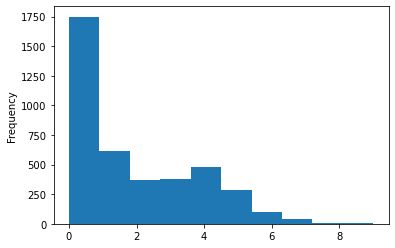

In [35]:
# Copy "WT01" through "WT22" to a new DataFrame
WT = weather.loc[:, 'WT01':'WT22']

# Calculate the sum of each row in "WT"
weather['bad_conditions'] = WT.sum(axis='columns')

# Replace missing values in "bad_conditions" with "0" 
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize "bad_conditions"
weather['bad_conditions'].plot(kind='hist')

# Show plot
plt.show() 

### Rating the weather Conditions

In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a rating system for the weather.

The counts range from 0 to 9, and should be converted to ratings as follows:

* Convert ``0`` to ``'good'``
* Convert ``1`` through ``4`` to ``'bad'``
* Convert ``5`` through ``9`` to ``'worse'``

In [39]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good',
           1:'bad', 2 :'bad', 3 :'bad', 4 :'bad',
           5 :'worse', 6 :'worse', 7 :'worse', 8 :'worse', 9 :'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


### Changing the data type to Category

Since the rating column only has a few possible values, you'll change its data type to category in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

In [40]:
# Specify the logical order of the weather ratings
cats = pd.CategoricalDtype(['good', 'bad', 'worse'], ordered=True)

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype(cats)

# Examine the head of 'rating'
weather.rating.head()

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

# Lesson III

## Merging Datasets

Now that we've assigned a rating to the weather conditions each day, we need to merge that data with the traffic stop data so that we can analyze the relationship between weather and police behavior. Let's review how to merge two DataFrames.

### Preparing the First DataFrame

We'll return to the DataFrame of *Apple stock prices* that we've used throughout the course. This time, the opening price at *9:30 AM* and closing price at *4:00 PM* are listed for each day in separate rows.

Shortly, we're going to merge the apple DataFrame with another DataFrame. Because the index will be lost during the merge, we want to save it by moving it to a DataFrame column. We'll do this by using the ``reset_index()`` method and specifying that the operation should occur in place. 

You can see that ``date_and_time`` is now a DataFrame column, and the index is now the default integer index.

In [41]:
# new Apple DataFrame
apple = pd.read_csv('datasets/apple2.csv')

apple

,date_and_time,date,time,price
0,2018-02-14 09:30:00,2/14/18,9:30,163.04
1,2018-02-14 16:00:00,2/14/18,16:00,167.37
2,2018-02-15 09:30:00,2/15/18,9:30,169.79
3,2018-02-15 16:00:00,2/15/18,16:00,173.00


### Preparing the second DataFrame

The second DataFrame we're working with is called ``high_low``, and it contains the highest and lowest prices the Apple stock reached each day.

In [42]:
# high_low Dataset
high_low = pd.read_csv('datasets/high_low.csv')
high_low

,DATE,HIGH,LOW
0,2/14/18,167.54,162.88
1,2/15/18,173.09,169.00
2,2/16/18,174.82,171.77


We'd like to include the high data in the apple DataFrame, which we can do by merging the DataFrames. 

For the merge operation, we only need *two* columns from ``high_low``: 

* The ``date`` column, since it's the column on which the DataFrames will be joined
* The ``high`` column, since it's the column of interest. 

Thus, we'll create a new DataFrame called high that only includes these two columns.

In [43]:
high = high_low[['DATE', 'HIGH']]
high

,DATE,HIGH
0,2/14/18,167.54
1,2/15/18,173.09
2,2/16/18,174.82


# Merging the DataFrames

To merge the ``apple`` and ``high`` DataFrames, we'll use the ``pd.merge()`` function and save the result as ``apple_high``. Let's review the five arguments:

In [44]:
apple_high = pd.merge(left=apple, right=high,
                      left_on='date', right_on='DATE',
                      how='left')

* ``left=apple``: Left DataFrame
* ``right=high``: Right DataFrame
* ``left_on='date'``: Key Column in left DataFrame
* ``right_on='DATE'``: Key Column in right DataFrame
* ``how='left'``: Type of Join

### Comparing the DataFrames

Let's compare the merged DataFrame with the original two DataFrames:

In [45]:
apple_high

,date_and_time,date,time,price,DATE,HIGH
0,2018-02-14 09:30:00,2/14/18,9:30,163.04,2/14/18,167.54
1,2018-02-14 16:00:00,2/14/18,16:00,167.37,2/14/18,167.54
2,2018-02-15 09:30:00,2/15/18,9:30,169.79,2/15/18,173.09
3,2018-02-15 16:00:00,2/15/18,16:00,173.00,2/15/18,173.09


In [46]:
apple

,date_and_time,date,time,price
0,2018-02-14 09:30:00,2/14/18,9:30,163.04
1,2018-02-14 16:00:00,2/14/18,16:00,167.37
2,2018-02-15 09:30:00,2/15/18,9:30,169.79
3,2018-02-15 16:00:00,2/15/18,16:00,173.00


In [47]:
high

,DATE,HIGH
0,2/14/18,167.54
1,2/15/18,173.09
2,2/16/18,174.82


The first four columns of ``apple_high`` are identical to ``apple``. The data in the final two columns of ``apple_high`` came from the ``high`` DataFrame. 

Because the ``apple`` DataFrame contained two rows each from February 14 and 15, the high value of each of those dates appears twice in the ``apple_high`` DataFrame. 

But since the ``apple`` DataFrame did not contain any rows from February 16, the February 16 value from the high DataFrame was ignored.

### Setting the index

Since the merge is complete, we'll set the ``date_and_time`` column as the index of the ``apple_high`` DataFrame. This replaces the default index and reduces the number of columns to five.

In [48]:
apple_high.set_index('date_and_time', inplace=True)
apple_high

,date,time,price,DATE,HIGH
date_and_time,,,,,
2018-02-14 09:30:00,2/14/18,9:30,163.04,2/14/18,167.54
2018-02-14 16:00:00,2/14/18,16:00,167.37,2/14/18,167.54
2018-02-15 09:30:00,2/15/18,9:30,169.79,2/15/18,173.09
2018-02-15 16:00:00,2/15/18,16:00,173.00,2/15/18,173.09


> Before Exercises, lets run codes from the previous chapters...

In [50]:
# Police DataFrame
ri = pd.read_csv('datasets/police.csv')

## Cleaning and validating DataFrame as in Chapter 1
# Dropping the county_name column
ri.drop('county_name', axis='columns', inplace=True)
# Dropping stop_date and stop time rows with missing values
ri.dropna(subset=['stop_date', 'stop_time'], inplace=True)
# Dropping state column
ri.drop('state', axis='columns', inplace=True)
# Dropping driver_gender rows with missing values
ri.dropna(subset=['driver_gender'], inplace=True)

## Changing the Data Types
# Change the is_arrested column into a bool type
ri['is_arrested'] = ri.is_arrested.astype('bool')
# Combined stop date and stop time into a one column
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
# Convert combined column into a datetime
ri['stop_datetime'] = pd.to_datetime(combined)
# Set combined column into an index
ri.set_index('stop_datetime', inplace=True)
# Mapping
mapping = {'0-15 Min':'short',
           '16-30 Min':'medium',
           '30+ Min':'long'}

ri['stop_length'] = ri.stop_duration.map(mapping)
# Convert to Category type
cats = ['short', 'medium', 'long']

cat_type = pd.CategoricalDtype(categories=cats, ordered=True)

ri['stop_length'] = ri.stop_length.astype(cat_type)

# Check the DataFrame
ri.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,stop_length
stop_datetime,,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,short
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,short
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,short
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,medium
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,short


## Exercise

### Preparing the DataFrames

In this exercise, you'll prepare the traffic stop and weather rating DataFrames so that they're ready to be merged:

1. With the ``ri`` DataFrame, you'll move the ``stop_datetime`` index to a column since the index will be lost during the merge.
2. With the ``weather`` DataFrame, you'll select the ``DATE`` and ``rating`` columns and put them in a new DataFrame.

In [52]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

# Examine the head of 'ri'
ri.head()

,index,stop_datetime,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,stop_length
0,0,2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,short
1,1,2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,short
2,2,2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,short
3,3,2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,medium
4,4,2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,short


In [53]:
# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE', 'rating']]

# Examine the head of 'weather_rating'
weather_rating.head()

,DATE,rating
0,2005-01-01,bad
1,2005-01-02,bad
2,2005-01-03,bad
3,2005-01-04,bad
4,2005-01-05,bad


### Merging the DataFrames

In this exercise, you'll merge the ``ri`` and ``weather_rating`` DataFrames into a new DataFrame, ``ri_weather``.

The DataFrames will be joined using the ``stop_date`` column from ``ri`` and the ``DATE`` column from ``weather_rating``. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set ``stop_datetime`` as the index, which is the column you saved in the previous exercise.

In [56]:
# Examine the shape of 'ri'
print(ri.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating,
                      left_on='stop_date', right_on='DATE',
                      how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

(86536, 16)
(86536, 18)
